<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/BannerUFPR.png" width="700" alt="PPGOLD/PPGMNE Python:INTRO"  />
</p>

# Data Science for Businnes - Aula 04

## Prof. Eduardo Pécora

# Bias and Variability (Viés e Variabilidade)
Tempo estimado: **30** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Entender os conceitos de um modelo com alto viés
* Entender o “bias-variance tradeoff”

## Bibliotecas

In [14]:
# importando a biblioteca pandas para manipulação de dados
import pandas as pd

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando a biblioteca numpy e math que fornece funções matemáticas básicas
import numpy as np
import math 

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# Importando a classe LinearRegression do sklearn 
# Essa classe implementa uma versão da regressão linear simples ou múltipla
# Usado para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline


## Obtendo dados

In [15]:
# Caminho do arquivo csv
caminho = "https://raw.githubusercontent.com/EduPekUfpr/PythonProject/refs/heads/main/Dados/MeuAutoLimpo.csv" 

#Obtendo arquivo e passando-o para um dataframe
df = pd.read_csv(caminho) 

## Tranformação das variáveis

In [16]:
df_dummy = df.copy()
df_dummy.drop(['fuel-type', 'aspiration', 'body-style', 'drive-wheels','make','num-of-doors',
               'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'], axis =1, inplace = True)

# Adicionando 150 colunas aleatórias no DF original (gerar um overfit)
cols = 150
# gera 150 colunas de uma só vez
random_data = np.random.randint(1, 100, size=(len(df_dummy), cols))

# lista de nomes para as colunas
col_names = ['Random_' + str(i+1) for i in range(cols)]

# cria um DF
random_df = pd.DataFrame(random_data, columns=col_names)

# concatenation com o Dummy
df_dummy = pd.concat([df_dummy, random_df], axis=1)

df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Columns: 166 entries, symboling to Random_150
dtypes: float64(10), int64(156)
memory usage: 260.8 KB


## KFOLD CrossValidation

In [19]:
# Original Data
X = df_dummy.drop(['price'], axis = 1)
Y = df_dummy['price']

# Separate features and target variable
X = df_dummy.drop(columns=['price'])
y = df_dummy['price']

# Initialize the KFold object with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)


## Avalia o modelo nas variáveis de treino e teste

In [49]:
# Inicializa as listas para guardar os indicadores
mse_scores = []
mae_scores = []
mape_scores = []
r2_scores = []

# Itera em cada FOLD
for train_index, test_index in kf.split(X):
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # Treina o Modelo
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    # Predição
    y_pred_train = lm.predict(X_train)
    
     # Calcula o Mean Squared Error
    mse = mean_squared_error(y_train, y_pred_train)
    mae = mean_absolute_error(y_train, y_pred_train)
    mape= mae/y_train.mean()
    
    mse_scores.append(mse)
    mae_scores.append(mae)
    mape_scores.append(mape)
    r2_scores.append(r2_score(y_train,y_pred_train))

# Calcula as médias e imprime
print("Resultados dos dados de Treino")
print(f"Average MSE : {np.mean(mse_scores):.3f}")
print(f"Average MAE : {np.mean(mae_scores):.3f}")
print(f"Average MAPE: {np.mean(mape_scores):.3f}")
print(f"Average R2  : {np.mean(r2_scores):.3f}")
r2_train = np.array(r2_scores)

# ReInicializa as listas para guardar os indicadores
mse_scores = []
mae_scores = []
mape_scores = []
r2_scores = []

# Itera em cada FOLD
for train_index, test_index in kf.split(X):
    # Split data into train and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # Treina o Modelo
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    # Predição
    y_pred_test = lm.predict(X_test)
    
    # Calcula o Mean Squared Error
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    mape= mae/y_test.mean()
    
    mse_scores.append(mse)
    mae_scores.append(mae)
    mape_scores.append(mape)
    r2_scores.append(r2_score(y_test,y_pred_test))

# Calcula as médias e imprime
print("\n\nResultados dos dados de Teste")
print(f"Average MSE : {np.mean(mse_scores):.3f}")
print(f"Average MAE : {np.mean(mae_scores):.3f}")
print(f"Average MAPE: {np.mean(mape_scores):.3f}")
print(f"Average R2  : {np.mean(r2_scores):.3f}")
r2_test = np.array(r2_scores)

Resultados dos dados de Treino
Average MSE : 840620.546
Average MAE : 719.547
Average MAPE: 0.054
Average R2  : 0.987


Resultados dos dados de Teste
Average MSE : 117809427.216
Average MAE : 8861.396
Average MAPE: 0.686
Average R2  : -2.561


In [50]:
print(r2_train)
print(r2_test)

[0.98689477 0.98525232 0.98947854 0.98846673 0.98542896 0.98012802
 0.98272218 0.99076639 0.98559448 0.99099956]
[ 1.53126970e-03  1.35667165e-01 -3.73302520e+00 -4.58745328e+00
 -2.99517237e+00 -1.16712858e-01 -4.00731238e+00 -3.89572514e+00
 -6.54023640e+00  1.24119559e-01]


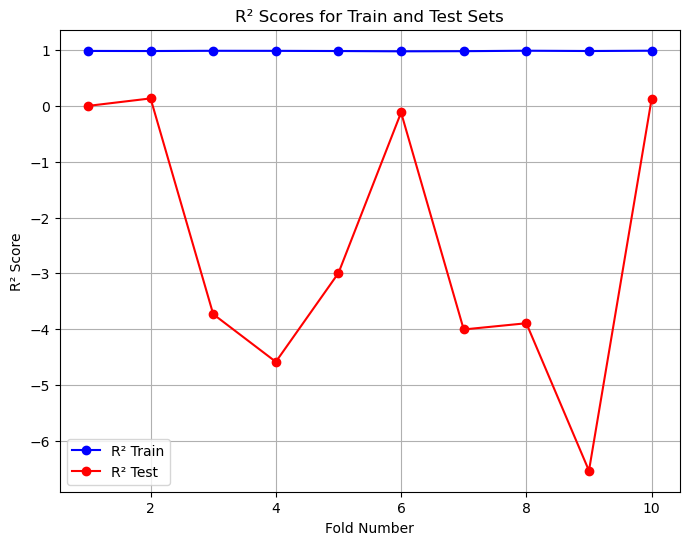

In [51]:
# Gera x para cada fold
x = np.arange(1, len(r2_train) + 1)

# Plot R² 
plt.figure(figsize=(8, 6))
plt.plot(x, r2_train, label='R² Train', marker='o', color='blue')
plt.plot(x, r2_test, label='R² Test', marker='o', color='red')

# Nomes e eixos
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.title('R² Scores for Train and Test Sets')

# Legenda
plt.legend()

# ShowTime
plt.grid(True)
plt.show()

## Fique Conectado

- [![YouTube](https://img.icons8.com/ios-filled/40/000000/youtube-play.png)](https://www.youtube.com/@LigaDataScience/videos)  
  Explore nossos vídeos educacionais e webinars sobre ciência de dados, machine learning e inteligência artificial. Inscreva-se para não perder nenhuma atualização!

- [![LinkedIn](https://img.icons8.com/ios-filled/40/000000/linkedin.png)](https://www.linkedin.com/company/liga-data-science-ufpr/)  
  Siga-nos no LinkedIn para as últimas novidades, oportunidades de carreira e networking profissional no campo da ciência de dados.

- [![Instagram](https://img.icons8.com/ios-filled/40/000000/instagram-new.png)](https://www.instagram.com/ligadatascience/)  
  Confira nosso Instagram para conteúdos dos bastidores, destaques de eventos e o dia a dia da Liga Data Science. Faça parte da nossa jornada!


## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

## Referências:

* Documentação da biblioteca <a href="https://pandas.pydata.org/docs/">Pandas</a>
* Documentação do método <a href=https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html>cross_val_score</a>
* Documentação do método <a href=https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.KFold.html>KFold</a>



## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
| 24-04-2024       | 1.0     | Eduardo Pecora    | Inicial               |
| 03-10-2024       | 1.1     | Eduardo Pecora    | Estrutura de Aula               |